## Part 1

In [10]:
%pip install -q nltk

Note: you may need to restart the kernel to use updated packages.


In [11]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize

import string

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk_lemmatizer = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Загрузим тексты по тематике "**Наука**":

*   sci.crypt: криптография;
*   sci.space: космос;
*   sci.med: медицина.

In [13]:
categories = ['sci.crypt', 'sci.space', 'sci.med']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Просмотрим первый текст из загруженных

In [15]:
ind = 0
print(train.data[ind], sep='\n')

From: gtoal@gtoal.com (Graham Toal)
Subject: Re: "clipper chip"
Lines: 30

	From: "dan mckinnon" <dan.mckinnon@canrem.com>

	   I have lurked here a bit lately, and though some of the math is
	unknown to me, found it interesting. I thought I would post an article I
	found in the Saturday, April 17, 1993 Toronto Star:

	                  'CLIPPER CHIP' to protect privacy

Politics is of course Dirty Pool, old man, and here we have a classic
example: the NSA and the administration have been working on this for
a *long* time, and in parallel with the announcement to us techies, we
see they're hitting the press with propoganda.

It's my bet the big magazines - Byte, Scientific American, et all - will
be ready to run with a pre-written government-slanted story on this in
the next issue.  ('Just keep us some pages spare boys, we'll give you
the copy in time for the presses')

We *must* get big names in the industry to write well argued pieces against
this proposal (can you call it that when 

Создадим функцию для предварительной обработки обучающих и тестовых данных. Функция выполняет:


*   Токенизацию;
*   Приведение к нижнему регистру;
*   Удаление знаков пунктуации, стоп-слов, цифр;
*   Лемматизацию.



In [17]:
punct = string.punctuation
stop_words = stopwords.words('english')

def data_processing(data):
  output_data = []
  for text in data:
      text_processed = []
      for word in word_tokenize(text):
          word = word.lower().strip(punct)
          if (word.replace('-', '')).isalpha() and word not in stop_words: #оставляем слова, написанные через дефис, предполагая, что они  выражают единое понятие
              text_processed.append(nltk_lemmatizer.lemmatize(word))

      output_data.append(' '.join(text_processed))

  return output_data

train.data_processed = data_processing(train.data)

print(f'Данные до обработки: {train.data}')
print(f'Данные после обработки: {train.data_processed}')

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Создаем векторизатор. Передаем параметр `stop_words=None`, так как удаление стоп слов мы уже выполнили ранее.

In [19]:
vectorizer = TfidfVectorizer(stop_words=None)
tfidf_matrix = vectorizer.fit_transform(train.data_processed)

Преобразуем текст в числовые признаки с помощью векторизатора и обучим модель логистической регрессии с подбором параметра регуляризации C. Выведем метрики на обучающей выборке.

In [21]:
model = Pipeline([
    ('vectorizer', vectorizer),
    ('logistic regression', LogisticRegressionCV(cv=3, n_jobs=-1))
])


In [23]:
model.fit(train.data_processed, train.target)
train_accuracy = accuracy_score(train.target, model.predict(train.data_processed))
print(f'Accuracy on train: {train_accuracy:.4f}')

Accuracy on train: 1.0000


Обработаем тестовые данные и выведем для них метрики.

In [25]:
test.data_processed = data_processing(test.data)
print(f'Данные до обработки: {test.data}')
print(f'Данные после обработки: {test.data_processed}')

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [26]:
test_accuracy = accuracy_score(test.target, model.predict(test.data_processed))
print(f'Accuracy on test: {test_accuracy:.4f}')

Accuracy on test: 0.9747


## Part 2

In [34]:
pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.3 MB 6.3 MB/s eta 0:01:03
   ---------------------------------------- 0.5/390.3 MB 6.7 MB/s eta 0:00:59
   ---------------------------------------- 0.5/390.3 MB 6.7 MB/s eta 0:00:59
   ---------------------------------------- 0.5/390.3 MB 6.7 MB/s eta 0:00:59
   ---------------------------------------- 1.8/390.3 MB 8.4 MB/s eta 0:00:47
   ---------------------------------------- 2.3/390.3 MB 8.7 MB/s eta 0:00:45
   ---------------------------------------- 2.8/390.3 MB 8.9 MB/s eta 0:00:44
   ---------------------------------------- 3.3/390.3 MB 9.1 MB/s eta 0:00:43
   ---------------------------------------- 3.8/390.3 MB 9.3 MB/s eta 0:00:42
   ---------------------------------------- 4.3/390.3 MB 9.5 MB/s eta 0:00

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
# Функция предобработки текста
punct = string.punctuation
stop_words = stopwords.words('english')

def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление цифр и знаков препинания
    text = re.sub(r'[dW]+', ' ', text)
    # Токенизация и удаление стоп-слов
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Лемматизация
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Загрузка данных
categories = ['sci.crypt', 'sci.space', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)
X = newsgroups.data
y = newsgroups.target

# Предобработка текстов
X_processed = [preprocess_text(text) for text in X]

In [39]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Токенизация и паддинг
max_words = 10000  # Максимальное количество слов в словаре
max_length = 100  # Максимальная длина последовательности

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Преобразование меток в категориальный формат
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [40]:
# Создание модели CNN
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(set(y)), activation='softmax'))  # Для многоклассовой классификации

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
# Обучение модели
history = model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.3901 - loss: 1.0879 - val_accuracy: 0.7811 - val_loss: 0.5317
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9240 - loss: 0.2226 - val_accuracy: 0.9642 - val_loss: 0.1230
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9966 - loss: 0.0121 - val_accuracy: 0.9516 - val_loss: 0.1401
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9600 - val_loss: 0.1371
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 1.0000 - loss: 3.6043e-04 - val_accuracy: 0.9579 - val_loss: 0.1413
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 1.0000 - loss: 3.2853e-04 - val_accuracy: 0.9621 - val_loss: 0.1467
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 2.9101e-04 - val_accuracy: 0.9684 - val_loss: 0.1438
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 4.8805e-04 - val_accu

In [42]:
# Оценка на тестовом наборе данных
loss, accuracy = model.evaluate(X_test_pad, y_test_cat)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Предсказание и вывод отчета о классификации
y_pred = np.argmax(model.predict(X_test_pad), axis=-1)
print(classification_report(y_test, y_pred))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9661 - loss: 0.1616
Loss: 0.22647297382354736, Accuracy: 0.9545454382896423
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       208
           1       0.96      0.94      0.95       191
           2       0.92      0.99      0.95       195

    accuracy                           0.95       594
   macro avg       0.96      0.95      0.95       594
weighted avg       0.96      0.95      0.95       594



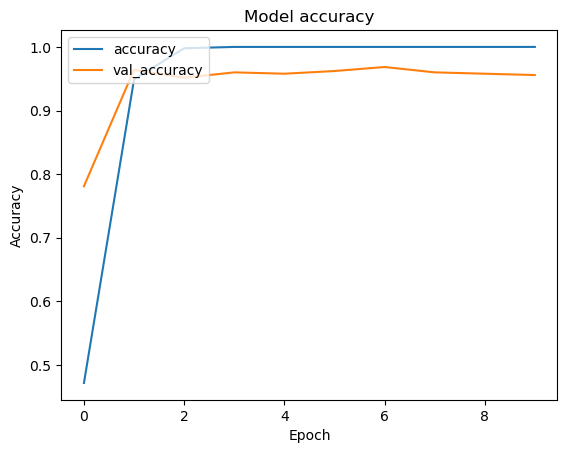

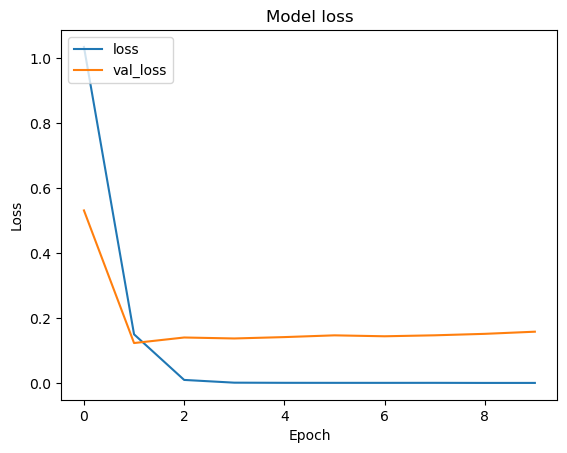

In [43]:
# Визуализация метрик обучения
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()